### EDA

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("student_data.csv")
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


In [2]:
import matplotlib.pyplot as plt

df.info()
#grade가 y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


<BarContainer object of 19 artists>

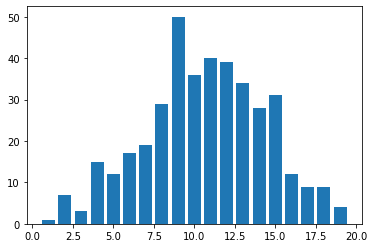

In [3]:
#y그래프 그려봄
plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)

In [4]:
import scipy.stats as stats
stats.shapiro(df['grade'])

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

귀무가설을 기각한다. 즉 정규분포를 따르지 않는다.

다양한 값이 있으므로 회귀분석을 진행하는 것이 좋을것으로 판단함

- 상관계수 행렬

<AxesSubplot:>

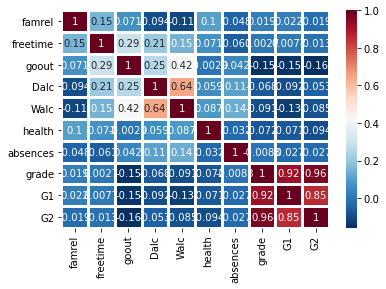

In [6]:
import seaborn as sns
df_cor=df.corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns, cmap='RdBu_r', annot=True, linewidth=3)

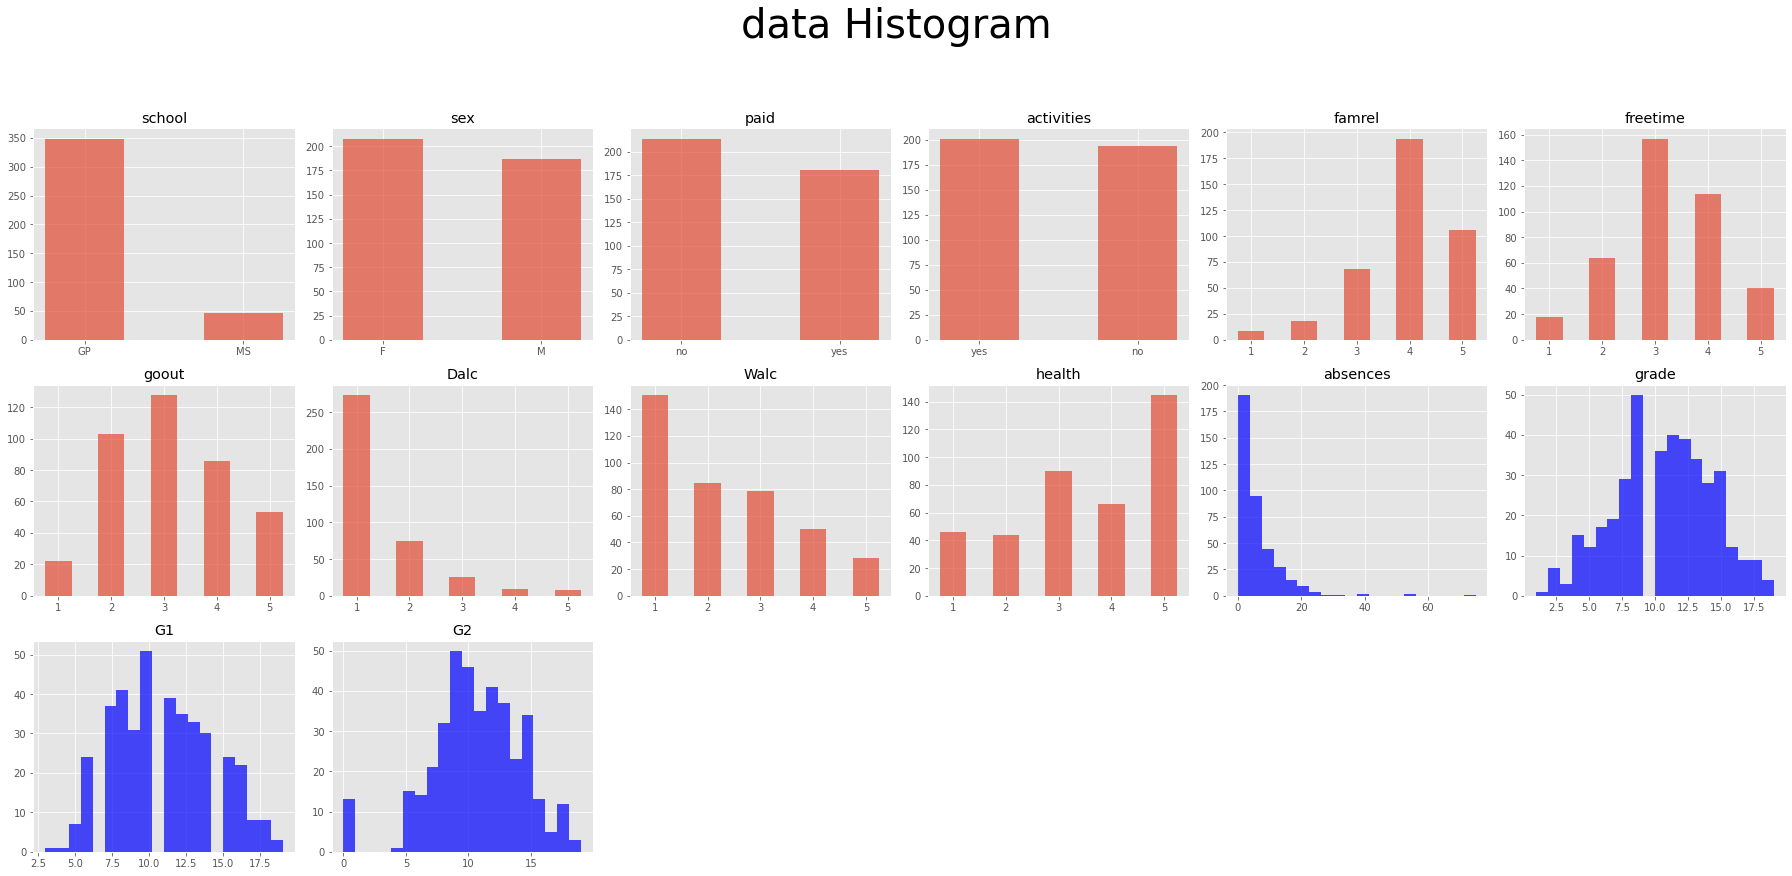

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(25,20))
plt.suptitle("data Histogram", fontsize=40)

cols=df.columns
for i in range(len(cols)):
    plt.subplot(5,6,i+1)
    plt.title(cols[i])
    if len(df[cols[i]].unique())>10:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        
    else:
        temp=df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

독립변수 중 school의 경우 비대칭성이 있으므로 주의

### 결측치 식별

In [8]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

- 수치형 변수 : 평균이나 중앙값 대치 or KNN을 이용한 대치
    
- 범주형 변수 : 최빈값 대치

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


school, sex, paid, activities는 범주형으로 제거

In [12]:
from sklearn.impute import KNNImputer

imputer=KNNImputer()
KNN_data=df.drop(columns=['school', 'sex', 'paid', 'activities'])
df_filled=imputer.fit_transform(KNN_data)
df_filled=pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns]=df_filled

df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

### 범주형 인코딩

In [13]:
df=pd.get_dummies(df, columns=['school', 'sex', 'paid', 'activities'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 32.5 KB


### 데이터 분할방법

랜덤분할, 층화추출기법

In [14]:
from sklearn.model_selection import train_test_split

X=df.drop('grade', axis=1)
y=df['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2022)

In [15]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [20]:
#SVM
from sklearn.model_selection import GridSearchCV
param_grid=[{'C':[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10]}]
grid_svm=GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
result=pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score']=grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False).head(3)

,C,gamma,mean_test_score
15,100.0,0.001,0.960941
11,10.0,0.010,0.957198
16,100.0,0.010,0.947652


In [21]:
svr=SVR(C=100, gamma=0.001)
svr.fit(X_train_scaled, y_train)

print(svr.score(X_test_scaled, y_test))
print(np.sqrt(mean_squared_error(y_test, svr.predict(X_test_scaled))))

0.9574163452579298
0.7753004545895938


In [23]:
#랜덤포레스트
rf_grid=[{'max_depth':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}]
rf=GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid=rf_grid, cv=5)
rf.fit(X_train, y_train) #정규화 안해도됨

print(rf.best_params_)
print(rf.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

{'max_depth': 6, 'min_samples_split': 2}
0.953206862630888
0.8127175814205351


In [31]:
xgb_grid=[{'max_depth':[2,4,6,8,10]}]
xgb=GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid, cv=5)
xgb.fit(X_train, y_train)
xgb.best_params_

{'max_depth': 10}

In [29]:
xgb=XGBRegressor(max_depth=10, n_estimators=1000)
xgb.fit(X_train, y_train)

print(xgb.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, xgb.predict(X_test))))

0.963211004628444
0.7206220334000073


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

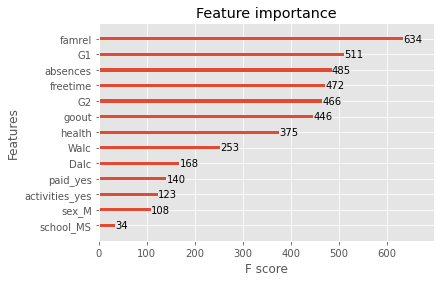

In [30]:
from xgboost import plot_importance

plot_importance(xgb.best_estimator_)